In [204]:
# import necessary library
import pandas as pd
import math
import numpy as np
from datetime import datetime
import geopandas as gpd
import seaborn as sns
from matplotlib import pyplot as plt

# Helper Function

In [205]:
# define a function to get the week number
def get_week_in_month(df, date_column):
    df["day"] = df[date_column].dt.day

    df["week_of_month"] = df["day"].apply(lambda x: math.ceil(x / 7))

    #del df["day"]

    return df

In [206]:
# import static variable
static_var=pd.read_csv('H:/Desktop/AT Census/D12Analysis/Static_data_circular_0.25_mile_buffer.csv')
static_var['distanc_sch_coll_uni'] = static_var[[ 'min_dist_to_school', 'min_dist_to_college', 'min_dist_to_university']].min(axis=1)
static_var.rename(columns={'Distance to water area': 'Distance_to_water_area'}, inplace=True)
static_var=static_var.loc[static_var['bike_ped_t']==1]
static_var.head()

,id,serial_num,user_type,domain,site_name,lat,long,bike_true,bike_ped_t,DISTRICT,...,Distance_to_water_area,park Area,Distance to Park Center,School,min_dist_to_school,college,min_dist_to_college,University,min_dist_to_university,distanc_sch_coll_uni
0,100002694,,['bicycle' 'pedestrian'],OC Parks,LIWH: Borrego Trail,33.683254,-117.66208,1,1,12,...,0.830152,0.011188,0.192821,1,0.095495,0,6.641928,0,8.828075,0.095495
1,100002695,,['bicycle' 'pedestrian'],OC Parks,LIWH: Serrano Trail (Gate 5),33.672590,-117.65186,1,1,12,...,0.546286,0.000000,0.393814,0,0.859881,0,7.219121,0,9.272793,0.859881
2,100002696,X2H21045761,['bicycle' 'horse' 'pedestrian'],OC Parks,Bellview / Dove Canyon,33.636400,-117.57360,1,1,12,...,0.445287,0.002054,0.066812,0,0.632868,0,7.911967,0,10.905523,0.632868
3,100002697,,['bicycle' 'horse' 'pedestrian'],OC Parks,OC_04 [X2311101558],33.866030,-117.71625,1,1,12,...,0.381162,0.000000,0.691497,0,0.726372,0,5.653016,0,9.349656,0.726372
4,100002698,,['bicycle' 'horse' 'pedestrian'],OC Parks,Santiago Creek Trail / Irvine Park [X2311101559],33.802960,-117.76664,1,1,12,...,0.240756,0.001453,0.437461,0,0.900400,0,0.514099,0,5.025631,0.514099


In [207]:
static_var['bike_ped_t'].describe()

count    64.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: bike_ped_t, dtype: float64

In [208]:
# Import eco hourly volume after QA/Qc
eco_hr_vol=pd.read_csv('H:/Desktop/AT Census/D12Analysis/hourly-ped-eco-2019-2022.csv')
eco_hr_vol.head()

,Unnamed: 0,id,site_name,date,counts
0,23400,300019780,5335 W. Adams Blvd. (SLID: 91324),2021-09-02 00:00:00+00:00,0.0
1,23401,300019780,5335 W. Adams Blvd. (SLID: 91324),2021-09-02 01:00:00+00:00,0.0
2,23402,300019780,5335 W. Adams Blvd. (SLID: 91324),2021-09-02 02:00:00+00:00,0.0
3,23403,300019780,5335 W. Adams Blvd. (SLID: 91324),2021-09-02 03:00:00+00:00,0.0
4,23404,300019780,5335 W. Adams Blvd. (SLID: 91324),2021-09-02 04:00:00+00:00,0.0


In [209]:
# collapse the date column
eco_hr_vol[[ "Date","time_zone"]] = eco_hr_vol["date"].str.split(" ", expand = True)
eco_hr_vol['Date'] = pd.to_datetime(eco_hr_vol['Date'], errors='coerce')
eco_hr_vol.head()

,Unnamed: 0,id,site_name,date,counts,Date,time_zone
0,23400,300019780,5335 W. Adams Blvd. (SLID: 91324),2021-09-02 00:00:00+00:00,0.0,2021-09-02,00:00:00+00:00
1,23401,300019780,5335 W. Adams Blvd. (SLID: 91324),2021-09-02 01:00:00+00:00,0.0,2021-09-02,01:00:00+00:00
2,23402,300019780,5335 W. Adams Blvd. (SLID: 91324),2021-09-02 02:00:00+00:00,0.0,2021-09-02,02:00:00+00:00
3,23403,300019780,5335 W. Adams Blvd. (SLID: 91324),2021-09-02 03:00:00+00:00,0.0,2021-09-02,03:00:00+00:00
4,23404,300019780,5335 W. Adams Blvd. (SLID: 91324),2021-09-02 04:00:00+00:00,0.0,2021-09-02,04:00:00+00:00


In [210]:
# Make a date from year, month and day; then calculate the number of days in that particular month
# cols=["year","month","day"]
# eco_hr_vol['Date'] = eco_hr_vol[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
# eco_hr_vol['Date'] = pd.to_datetime(eco_hr_vol['Date'], errors='coerce')
eco_hr_vol['month'] = eco_hr_vol['Date'].dt.month
eco_hr_vol['year'] = eco_hr_vol['Date'].dt.year
eco_hr_vol['day'] = eco_hr_vol['Date'].dt.day
eco_hr_vol['days_in_month'] = eco_hr_vol['Date'].dt.days_in_month
eco_hr_vol['weekno']=eco_hr_vol['Date'].dt.week
eco_hr_vol['dayofweek'] = eco_hr_vol['Date'].dt.dayofweek
eco_hr_vol.head()

C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_4144\1510869477.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  eco_hr_vol['weekno']=eco_hr_vol['Date'].dt.week


,Unnamed: 0,id,site_name,date,counts,Date,time_zone,month,year,day,days_in_month,weekno,dayofweek
0,23400,300019780,5335 W. Adams Blvd. (SLID: 91324),2021-09-02 00:00:00+00:00,0.0,2021-09-02,00:00:00+00:00,9,2021,2,30,35,3
1,23401,300019780,5335 W. Adams Blvd. (SLID: 91324),2021-09-02 01:00:00+00:00,0.0,2021-09-02,01:00:00+00:00,9,2021,2,30,35,3
2,23402,300019780,5335 W. Adams Blvd. (SLID: 91324),2021-09-02 02:00:00+00:00,0.0,2021-09-02,02:00:00+00:00,9,2021,2,30,35,3
3,23403,300019780,5335 W. Adams Blvd. (SLID: 91324),2021-09-02 03:00:00+00:00,0.0,2021-09-02,03:00:00+00:00,9,2021,2,30,35,3
4,23404,300019780,5335 W. Adams Blvd. (SLID: 91324),2021-09-02 04:00:00+00:00,0.0,2021-09-02,04:00:00+00:00,9,2021,2,30,35,3


In [211]:
# transform the dataframe
eco_hr_vol = get_week_in_month(eco_hr_vol, "Date")
eco_hr_vol.head()

,Unnamed: 0,id,site_name,date,counts,Date,time_zone,month,year,day,days_in_month,weekno,dayofweek,week_of_month
0,23400,300019780,5335 W. Adams Blvd. (SLID: 91324),2021-09-02 00:00:00+00:00,0.0,2021-09-02,00:00:00+00:00,9,2021,2,30,35,3,1
1,23401,300019780,5335 W. Adams Blvd. (SLID: 91324),2021-09-02 01:00:00+00:00,0.0,2021-09-02,01:00:00+00:00,9,2021,2,30,35,3,1
2,23402,300019780,5335 W. Adams Blvd. (SLID: 91324),2021-09-02 02:00:00+00:00,0.0,2021-09-02,02:00:00+00:00,9,2021,2,30,35,3,1
3,23403,300019780,5335 W. Adams Blvd. (SLID: 91324),2021-09-02 03:00:00+00:00,0.0,2021-09-02,03:00:00+00:00,9,2021,2,30,35,3,1
4,23404,300019780,5335 W. Adams Blvd. (SLID: 91324),2021-09-02 04:00:00+00:00,0.0,2021-09-02,04:00:00+00:00,9,2021,2,30,35,3,1


In [212]:
# Unique date info
unique_date=eco_hr_vol[['id','site_name','year','month','day','Date']]
unique_date1=unique_date.drop_duplicates(subset=['id','site_name','year','month','day','Date'], keep='first')
unique_date1.shape

(80349, 6)

In [213]:
# Now calculate the hour data collected
Valid_hrs=pd.DataFrame({'no_of_hrs_data_collected':eco_hr_vol.groupby(['id','year','month','day','weekno'])['id'].count()}).reset_index()
Valid_hrs.head()

,id,year,month,day,weekno,no_of_hrs_data_collected
0,100000671,2019,1,1,1,24
1,100000671,2019,1,2,1,24
2,100000671,2019,1,3,1,24
3,100000671,2019,1,4,1,24
4,100000671,2019,1,5,1,24


In [214]:
Valid_hrs['no_of_hrs_data_collected'].describe()

count    80349.000000
mean        23.999191
std          0.028431
min         23.000000
25%         24.000000
50%         24.000000
75%         24.000000
max         24.000000
Name: no_of_hrs_data_collected, dtype: float64

In [215]:
# Allow 24 hrs of data only
eco_hr_vol_filter=pd.merge(eco_hr_vol, Valid_hrs, on=['id','year','month','day','weekno'], how='inner')
eco_hr_vol_filter1=eco_hr_vol_filter.loc[eco_hr_vol_filter['no_of_hrs_data_collected']>=24]
eco_hr_vol_filter1.shape

(1926816, 15)

In [216]:
# Now calculate the daily volume using AASHTO Method
Daily_Volume=pd.DataFrame({'Daily_Volume':eco_hr_vol_filter1.groupby(['id','site_name','year','month','day','weekno','dayofweek','week_of_month'])['counts'].sum()}).reset_index()
Daily_Volume.head()

,id,site_name,year,month,day,weekno,dayofweek,week_of_month,Daily_Volume
0,100000671,BART AT SPIRE,2019,1,1,1,1,1,382.0
1,100000671,BART AT SPIRE,2019,1,2,1,2,1,226.0
2,100000671,BART AT SPIRE,2019,1,3,1,3,1,232.0
3,100000671,BART AT SPIRE,2019,1,4,1,4,1,228.0
4,100000671,BART AT SPIRE,2019,1,5,1,5,1,143.0


In [217]:
# Now calculate the day of year from datetime import datetime
# eco_daily_vol["day_of_year"] = eco_daily_vol.date.apply(lambda x:x.dayofyear)
# eco_daily_vol.tail()

In [218]:
# run some QA/QC before MADBT or AADBT Calculation
#1.no more than x days a month missing (x~3) and
#2.no more then one of any weekday missing

In [219]:
# calculate number of weekday in month
#in day of week Monday=0 and sunday=6
# eco_daily_vol['weekno']=eco_daily_vol['date'].dt.week
# eco_daily_vol['dayofweek'] = eco_daily_vol['date'].dt.dayofweek
# eco_daily_vol.head(10)

In [220]:
check=Daily_Volume.loc[Daily_Volume['id']== 100000671]
check1=check.loc[check['year']==2019]
check2=check1.loc[check1['week_of_month']==1]
check2

,id,site_name,year,month,day,weekno,dayofweek,week_of_month,Daily_Volume
0,100000671,BART AT SPIRE,2019,1,1,1,1,1,382.0
1,100000671,BART AT SPIRE,2019,1,2,1,2,1,226.0
2,100000671,BART AT SPIRE,2019,1,3,1,3,1,232.0
3,100000671,BART AT SPIRE,2019,1,4,1,4,1,228.0
4,100000671,BART AT SPIRE,2019,1,5,1,5,1,143.0
...,...,...,...,...,...,...,...,...,...
336,100000671,BART AT SPIRE,2019,12,3,49,1,1,175.0
337,100000671,BART AT SPIRE,2019,12,4,49,2,1,133.0
338,100000671,BART AT SPIRE,2019,12,5,49,3,1,148.0
339,100000671,BART AT SPIRE,2019,12,6,49,4,1,255.0


In [221]:
Valid_weekdays=pd.DataFrame({'no_of_days_data_collected_per_week':Daily_Volume.groupby(['id','year','month','week_of_month'])['id'].count()}).reset_index()
Valid_weekdays.head(10)

,id,year,month,week_of_month,no_of_days_data_collected_per_week
0,100000671,2019,1,1,7
1,100000671,2019,1,2,7
2,100000671,2019,1,3,7
3,100000671,2019,1,4,7
4,100000671,2019,1,5,3
5,100000671,2019,2,1,7
6,100000671,2019,2,2,7
7,100000671,2019,2,3,7
8,100000671,2019,2,4,7
9,100000671,2019,3,1,7


In [222]:
check=Valid_weekdays.loc[Valid_weekdays['month']==1]
check['no_of_days_data_collected_per_week'].describe()

count    1137.000000
mean        5.881266
std         1.823886
min         1.000000
25%         4.000000
50%         7.000000
75%         7.000000
max         7.000000
Name: no_of_days_data_collected_per_week, dtype: float64

In [223]:
# Now separate 1-4 week windows for every month to apply no more than 1 day missing per week within this 4 week windows
Valid_weekdays14=Valid_weekdays.loc[Valid_weekdays['week_of_month']<5]
Valid_weekdays14_filter=Valid_weekdays14.loc[Valid_weekdays14['no_of_days_data_collected_per_week']>=6]
# last week of month data
Valid_weekdays5=Valid_weekdays.loc[Valid_weekdays['week_of_month']>4]
# now combine these two
Valid_weekdays_data=pd.concat([Valid_weekdays14_filter,Valid_weekdays5],axis=0)
Valid_weekdays_data.shape, Valid_weekdays.shape

((12766, 5), (13553, 5))

In [224]:
print('percentage of data lost:',(Valid_weekdays_data.shape[0]/Valid_weekdays.shape[0])/(Valid_weekdays.shape[0])*100)

percentage of data lost: 0.006949986539096649


In [225]:
# merge no of days data collected per week with main data frame
eco_daily_vol1=pd.merge(Daily_Volume,Valid_weekdays_data, left_on=['id','year','month','week_of_month'], right_on=['id','year','month','week_of_month'], how='inner')
#eco_daily_vol1_filter=eco_daily_vol1.loc[eco_daily_vol1['no_of_days_data_collected_per_week']>=6]
eco_daily_vol1.shape,Daily_Volume.shape 

((77590, 10), (80284, 9))

In [226]:
# now generate the date from year, month and day, then calculate days in month
cols=["year","month","day"]
eco_daily_vol1['Date'] = eco_daily_vol1[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
eco_daily_vol1['Date'] = pd.to_datetime(eco_daily_vol1['Date'], errors='coerce')
eco_daily_vol1['days_in_month'] = eco_daily_vol1['Date'].dt.days_in_month
eco_daily_vol1.head()

,id,site_name,year,month,day,weekno,dayofweek,week_of_month,Daily_Volume,no_of_days_data_collected_per_week,Date,days_in_month
0,100000671,BART AT SPIRE,2019,1,1,1,1,1,382.0,7,2019-01-01,31
1,100000671,BART AT SPIRE,2019,1,2,1,2,1,226.0,7,2019-01-02,31
2,100000671,BART AT SPIRE,2019,1,3,1,3,1,232.0,7,2019-01-03,31
3,100000671,BART AT SPIRE,2019,1,4,1,4,1,228.0,7,2019-01-04,31
4,100000671,BART AT SPIRE,2019,1,5,1,5,1,143.0,7,2019-01-05,31


In [227]:
# Calculate the maximum number of days allowed in each month
eco_daily_vol1['maximum_days_in_a_month_allowed']=eco_daily_vol1['days_in_month']-3
eco_daily_vol1.head(10)

,id,site_name,year,month,day,weekno,dayofweek,week_of_month,Daily_Volume,no_of_days_data_collected_per_week,Date,days_in_month,maximum_days_in_a_month_allowed
0,100000671,BART AT SPIRE,2019,1,1,1,1,1,382.0,7,2019-01-01,31,28
1,100000671,BART AT SPIRE,2019,1,2,1,2,1,226.0,7,2019-01-02,31,28
2,100000671,BART AT SPIRE,2019,1,3,1,3,1,232.0,7,2019-01-03,31,28
3,100000671,BART AT SPIRE,2019,1,4,1,4,1,228.0,7,2019-01-04,31,28
4,100000671,BART AT SPIRE,2019,1,5,1,5,1,143.0,7,2019-01-05,31,28
5,100000671,BART AT SPIRE,2019,1,6,1,6,1,43.0,7,2019-01-06,31,28
6,100000671,BART AT SPIRE,2019,1,7,2,0,1,141.0,7,2019-01-07,31,28
7,100000671,BART AT SPIRE,2019,1,8,2,1,2,187.0,7,2019-01-08,31,28
8,100000671,BART AT SPIRE,2019,1,9,2,2,2,139.0,7,2019-01-09,31,28
9,100000671,BART AT SPIRE,2019,1,10,2,3,2,247.0,7,2019-01-10,31,28


In [228]:
# Calculate the calender days of data collection
calender_day=eco_daily_vol1[['year','month','days_in_month']]
calender_day1=calender_day.drop_duplicates(subset=['year','month'], keep='first')
calender_day1.shape

(48, 3)

In [229]:
# Calculate number of days data collected in a month
Valid_day=pd.DataFrame({'no_of_days_data_collected':eco_daily_vol1.groupby(['id','year','month'])['day'].count()}).reset_index()
Valid_day.shape,eco_daily_vol1.shape

((2826, 4), (77590, 13))

In [230]:
Valid_day_unique=Valid_day.drop_duplicates(subset=['id','year','month','no_of_days_data_collected'], keep='first')
Valid_day_unique.shape

(2826, 4)

In [231]:
#lets combined togeter and filter out the data
eco_daily_vol1_filter1=pd.merge(eco_daily_vol1,Valid_day, left_on=['id','year','month'], right_on=['id','year','month'], how='inner')
eco_daily_vol1_filter2=eco_daily_vol1_filter1.loc[eco_daily_vol1_filter1['no_of_days_data_collected']>=eco_daily_vol1_filter1['maximum_days_in_a_month_allowed']]
eco_daily_vol1_filter2.head()

,id,site_name,year,month,day,weekno,dayofweek,week_of_month,Daily_Volume,no_of_days_data_collected_per_week,Date,days_in_month,maximum_days_in_a_month_allowed,no_of_days_data_collected
0,100000671,BART AT SPIRE,2019,1,1,1,1,1,382.0,7,2019-01-01,31,28,31
1,100000671,BART AT SPIRE,2019,1,2,1,2,1,226.0,7,2019-01-02,31,28,31
2,100000671,BART AT SPIRE,2019,1,3,1,3,1,232.0,7,2019-01-03,31,28,31
3,100000671,BART AT SPIRE,2019,1,4,1,4,1,228.0,7,2019-01-04,31,28,31
4,100000671,BART AT SPIRE,2019,1,5,1,5,1,143.0,7,2019-01-05,31,28,31


In [232]:
data_pt_lost=(eco_daily_vol1.shape[0]-eco_daily_vol1_filter2.shape[0])
total_datapoint=eco_daily_vol1.shape[0]

print('percentage of data lost:',(data_pt_lost/total_datapoint)*100)

percentage of data lost: 8.98311638097693


# Now calculate AASHTO AADBT

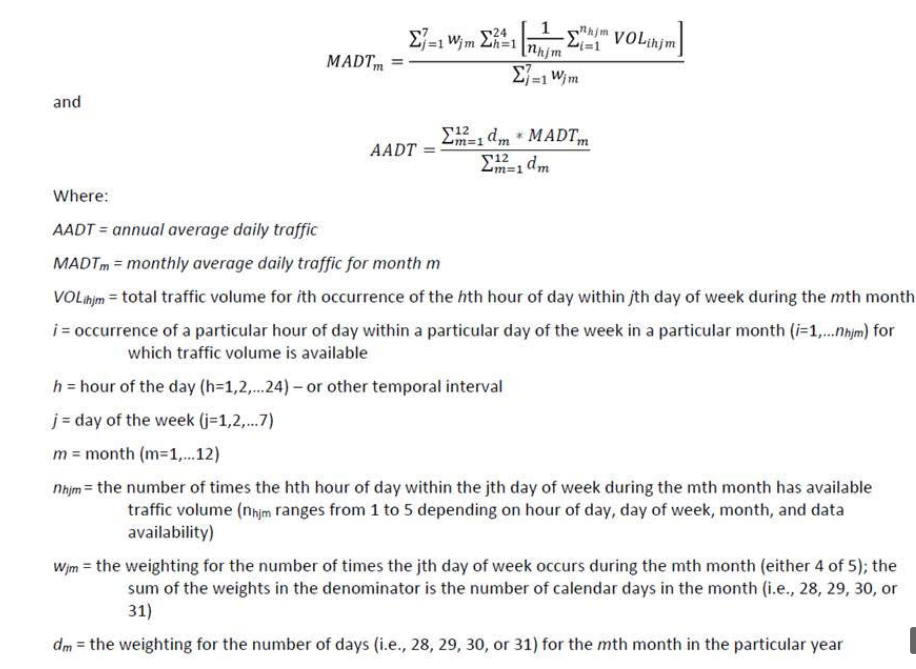

In [233]:
no_of_days_oocured_in_a_week=pd.DataFrame({'no_of_days_occured_in_week':eco_daily_vol1_filter2.groupby(['id','site_name','year','month','week_of_month'])['id'].count()}).reset_index()
# weekly_total_Volume=pd.DataFrame({'weekly_Volume':eco_daily_vol1_filter2.groupby(['id','site_name','year','month','weekno'])['Daily_Volume'].mean()}).reset_index()
no_of_days_oocured_in_a_week.head() 

,id,site_name,year,month,week_of_month,no_of_days_occured_in_week
0,100000671,BART AT SPIRE,2019,1,1,7
1,100000671,BART AT SPIRE,2019,1,2,7
2,100000671,BART AT SPIRE,2019,1,3,7
3,100000671,BART AT SPIRE,2019,1,4,7
4,100000671,BART AT SPIRE,2019,1,5,3


In [234]:
# Calculate the weekly volume
weekly_total_Volume=pd.DataFrame({'weekly_total_Volume':eco_daily_vol1_filter2.groupby(['id','site_name','year','month','week_of_month'])['Daily_Volume'].sum()}).reset_index()
Monthly_total_Volume=pd.DataFrame({'MTT':weekly_total_Volume.groupby(['id','site_name','year','month'])['weekly_total_Volume'].sum()}).reset_index()
# Now bring the calender day
Monthly_total_Volume1=pd.merge(Monthly_total_Volume,calender_day1, on=['year','month'], how='inner')
Monthly_total_Volume1['MADBT']=Monthly_total_Volume1['MTT']/Monthly_total_Volume1['days_in_month']
Monthly_total_Volume2=pd.merge(Monthly_total_Volume1,Valid_day_unique, on=['id','year','month'])
Monthly_total_Volume2['weighted_MADBT']=Monthly_total_Volume2['MADBT']*Monthly_total_Volume2['no_of_days_data_collected']
weighted_MADBT_sum=pd.DataFrame({'weighted_MADBT_sum':Monthly_total_Volume2.groupby(['id','site_name','year'])['weighted_MADBT'].sum()}).reset_index()
weighted_days_sum=pd.DataFrame({'weighted_days_sum':Monthly_total_Volume2.groupby(['id','site_name','year'])['no_of_days_data_collected'].sum()}).reset_index()
# Combine these two
aadbt_data=pd.merge(weighted_MADBT_sum,weighted_days_sum, on=['id','site_name','year'], how='inner')
aadbt_data1=aadbt_data.loc[aadbt_data['weighted_days_sum']>=348]
aadbt_data1['AADBT']=aadbt_data1['weighted_MADBT_sum']/aadbt_data1['weighted_days_sum']
# Now all the sites that have missed maximum 5% of the whole year data
aadbt_data1.head()

C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_4144\3683219024.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aadbt_data1['AADBT']=aadbt_data1['weighted_MADBT_sum']/aadbt_data1['weighted_days_sum']


,id,site_name,year,weighted_MADBT_sum,weighted_days_sum,AADBT
0,100000671,BART AT SPIRE,2019,120735.000000,365,330.780822
2,100000671,BART AT SPIRE,2021,126508.000000,365,346.597260
3,100000671,BART AT SPIRE,2022,136839.967742,363,376.969608
11,100003561,Oceanside SLR River Trail EB & WB,2019,28465.000000,365,77.986301
12,100003561,Oceanside SLR River Trail EB & WB,2020,223909.000000,366,611.773224


In [235]:
# Save the unique site
uni_ped_site=aadbt_data1.drop_duplicates(subset=['id','site_name'], keep='first')
uni_ped_site.shape
#uni_ped_site.to_csv('H:/Desktop/AT Census/D12Analysis/ped_unique_site.csv')

(49, 6)

In [239]:
# now read the unique counter with type of device a
dev=pd.read_csv('H:/Desktop/AT Census/D12Analysis/ped_unique_site_type.csv')
dev1=dev.loc[dev['Device_type']!='Citix 3D']
dev1.head()

,Unnamed: 0,id,site_name,year,weighted_MADBT_sum,weighted_days_sum,AADBT,Device_type
0,0,100000671,BART AT SPIRE,2019,120735.000000,365,330.780822,Eco-Combo 2
1,11,100003561,Oceanside SLR River Trail EB & WB,2019,28465.000000,365,77.986301,Eco-Combo 2
2,21,100003575,National City: Sweetwater Bike Path EB & WB,2019,91244.466667,364,250.671612,Eco-Combo 2
3,27,100003924,cmcrmgh,2019,189292.000000,365,518.608219,Boitier Eco
4,29,100003925,mvsssyc,2019,181576.000000,365,497.468493,Boitier Eco


In [240]:
dev2=dev1[['id','site_name']]
dev2.head()

,id,site_name
0,100000671,BART AT SPIRE
1,100003561,Oceanside SLR River Trail EB & WB
2,100003575,National City: Sweetwater Bike Path EB & WB
3,100003924,cmcrmgh
4,100003925,mvsssyc


In [241]:
aadbt_data2=pd.merge(aadbt_data1, dev2, on=['id','site_name'], how='inner')
aadbt_data1.shape, aadbt_data2.shape

((79, 6), (68, 6))

In [242]:
aadbt_data.shape, aadbt_data1.shape,aadbt_data2.shape

((280, 5), (79, 6), (68, 6))

In [243]:
aadbt_data2['AADBT'].describe()

count      68.000000
mean      282.118373
std       226.370288
min         0.000000
25%       103.299373
50%       204.236986
75%       433.795508
max      1144.320011
Name: AADBT, dtype: float64

In [244]:
aadbt_data2.groupby(['year'])['AADBT'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2019,23.0,231.770125,184.477617,30.200000,84.408126,184.475363,332.558634,643.058670
2020,22.0,324.171115,226.799808,0.000000,151.096995,282.935746,459.612705,809.098361
2021,12.0,215.687893,200.484605,26.493151,89.729476,137.040272,235.558219,630.287671
2022,11.0,375.756112,302.598981,93.880450,144.621006,376.969608,464.410353,1144.320011


# Calculate the DOY Factor Using formula DF=Daily Volume/AADBT

In [245]:
# Calculate the DOY
eco_aadbt1=pd.merge(eco_daily_vol1_filter2,aadbt_data2,on=['id','site_name','year'], how='inner' )
eco_aadbt1['DOY']=eco_aadbt1['Daily_Volume']/eco_aadbt1['AADBT']
eco_aadbt1.head()

,id,site_name,year,month,day,weekno,dayofweek,week_of_month,Daily_Volume,no_of_days_data_collected_per_week,Date,days_in_month,maximum_days_in_a_month_allowed,no_of_days_data_collected,weighted_MADBT_sum,weighted_days_sum,AADBT,DOY
0,100000671,BART AT SPIRE,2019,1,1,1,1,1,382.0,7,2019-01-01,31,28,31,120735.0,365,330.780822,1.154843
1,100000671,BART AT SPIRE,2019,1,2,1,2,1,226.0,7,2019-01-02,31,28,31,120735.0,365,330.780822,0.683232
2,100000671,BART AT SPIRE,2019,1,3,1,3,1,232.0,7,2019-01-03,31,28,31,120735.0,365,330.780822,0.701371
3,100000671,BART AT SPIRE,2019,1,4,1,4,1,228.0,7,2019-01-04,31,28,31,120735.0,365,330.780822,0.689278
4,100000671,BART AT SPIRE,2019,1,5,1,5,1,143.0,7,2019-01-05,31,28,31,120735.0,365,330.780822,0.432310


In [246]:
# Now lets consider only the District 12+11+7 data
doy_factor_d12=pd.merge(static_var,eco_aadbt1, on=['id','site_name'], how='inner')
doy_factor_d12.head()

,id,serial_num,user_type,domain,site_name,lat,long,bike_true,bike_ped_t,DISTRICT,...,Daily_Volume,no_of_days_data_collected_per_week,Date,days_in_month,maximum_days_in_a_month_allowed,no_of_days_data_collected,weighted_MADBT_sum,weighted_days_sum,AADBT,DOY
0,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,25.0,7,2019-01-01,31,28,31,51236.0,365,140.372603,0.178097
1,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,30.0,7,2019-01-02,31,28,31,51236.0,365,140.372603,0.213717
2,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,31.0,7,2019-01-03,31,28,31,51236.0,365,140.372603,0.220841
3,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,36.0,7,2019-01-04,31,28,31,51236.0,365,140.372603,0.256460
4,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,49.0,7,2019-01-05,31,28,31,51236.0,365,140.372603,0.349071


In [247]:
# Lets calculate the standard deviation 
doy_factor_d12["Standard Deviation"] = doy_factor_d12.groupby(['id','year'])["DOY"].std().reset_index()["DOY"]
doy_factor_d12['day_of_year'] = doy_factor_d12['Date'].dt.dayofyear
doy_factor_d12.head()

,id,serial_num,user_type,domain,site_name,lat,long,bike_true,bike_ped_t,DISTRICT,...,Date,days_in_month,maximum_days_in_a_month_allowed,no_of_days_data_collected,weighted_MADBT_sum,weighted_days_sum,AADBT,DOY,Standard Deviation,day_of_year
0,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,2019-01-01,31,28,31,51236.0,365,140.372603,0.178097,0.438886,1
1,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,2019-01-02,31,28,31,51236.0,365,140.372603,0.213717,0.942399,2
2,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,2019-01-03,31,28,31,51236.0,365,140.372603,0.220841,0.364420,3
3,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,2019-01-04,31,28,31,51236.0,365,140.372603,0.256460,1.175481,4
4,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,2019-01-05,31,28,31,51236.0,365,140.372603,0.349071,1.827818,5


In [248]:
# check how many sites survive in each year
doy_factor_d12.groupby(['year'])['id'].nunique()

year
2019    6
2020    4
2021    4
2022    3
Name: id, dtype: int64

In [249]:
# check how many sites survive in each year
doy_factor_d12['id'].nunique()

9

In [250]:
# check the variation of DOY factor
doy_factor_d12.groupby(['year'])['DOY'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2019,2189.0,1.000274,0.969237,0.000000,0.641151,0.895542,1.171826,30.953334
2020,1462.0,1.001109,0.592080,0.053942,0.649421,0.928156,1.306923,3.878888
2021,1459.0,1.000636,0.374351,0.070072,0.753698,0.926561,1.218866,3.872835
2022,1090.0,1.003658,0.516024,0.130104,0.746295,0.910218,1.125748,7.095361


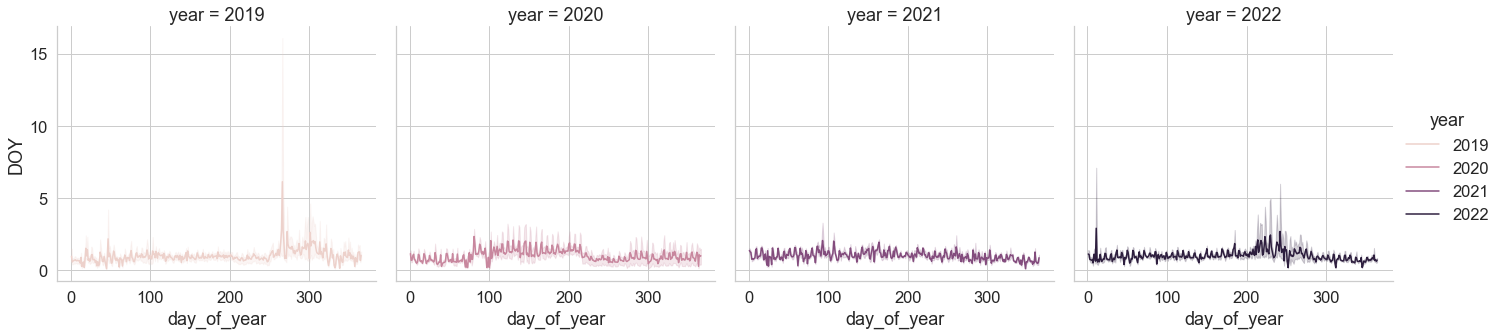

In [251]:
# now plot the DOY for all sites first
sns.relplot(
    data=doy_factor_d12, x="day_of_year", y="DOY",
    col="year", hue="year",
    kind="line"
)

In [252]:
doy_factor_d12.groupby(['year'])['id'].nunique()

year
2019    6
2020    4
2021    4
2022    3
Name: id, dtype: int64

In [253]:
doy_factor_d12.groupby(['Bicycle_Fa','year'])['id'].nunique()

Bicycle_Fa   year
Bike Lane    2019    1
             2020    1
             2021    1
             2022    1
Cycle Track  2022    1
Path         2019    1
Trail        2019    4
             2020    3
             2021    3
             2022    1
Name: id, dtype: int64

In [254]:
def strata(Bicycle_Fa,distanc_sch_coll_uni):
    if (distanc_sch_coll_uni<=0.25):
        return 1
#     elif ((distanc_sch_coll_uni>0.25) and (Distance_to_water_area<=0.25)):
#         return 2
    elif ((Bicycle_Fa=='Trail') and (distanc_sch_coll_uni>0.25)):
        return 2
    elif ((Bicycle_Fa=='Path') and (distanc_sch_coll_uni>0.25)):
        return 2
#    elif  ((Bicycle_Fa!='Path') and (Bicycle_Fa!='Trail')and (distanc_sch_coll_uni>0.25)):
#        return 3 
#     elif ((Bicycle_Fa=='Trail') and (Bicycle_Fa!='Bike Lane') and (distanc_sch_coll_uni>0.50) and (Distance_to_water_area>0.50)):
#         return 4
#     elif ((Bicycle_Fa=='Path') and (Bicycle_Fa!='Trail') and (Bicycle_Fa!='Bike Lane') and (distanc_sch_coll_uni>0.50) and (Distance_to_water_area>0.50)):
#         return 5
    else: 
        return 3

In [255]:
# Apply the strata function to classify the sites by strata
doy_factor_d12['Strata']=doy_factor_d12.apply(lambda row:strata(row['Bicycle_Fa'],row['distanc_sch_coll_uni']), axis=1)
doy_factor_d12.head()

,id,serial_num,user_type,domain,site_name,lat,long,bike_true,bike_ped_t,DISTRICT,...,days_in_month,maximum_days_in_a_month_allowed,no_of_days_data_collected,weighted_MADBT_sum,weighted_days_sum,AADBT,DOY,Standard Deviation,day_of_year,Strata
0,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,31,28,31,51236.0,365,140.372603,0.178097,0.438886,1,2
1,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,31,28,31,51236.0,365,140.372603,0.213717,0.942399,2,2
2,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,31,28,31,51236.0,365,140.372603,0.220841,0.364420,3,2
3,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,31,28,31,51236.0,365,140.372603,0.256460,1.175481,4,2
4,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,31,28,31,51236.0,365,140.372603,0.349071,1.827818,5,2


In [256]:
doy_factor_d12.columns

Index(['id', 'serial_num', 'user_type', 'domain', 'site_name', 'lat', 'long',
       'bike_true', 'bike_ped_t', 'DISTRICT', 'Region', 'Shape_Leng',
       'Bicycle_Fa', 'geometry', 'min_dist_to_CBD', 'Commercial Area ',
       'Distance to commercial area', 'retail Area ',
       'Distance to retail area', 'industrial Area ',
       'Distance to industrial area', 'residential Area ',
       'Distance to residential area', 'grass Area ', 'Distance to grass area',
       'forest Area ', 'Distance to forest area', 'education Area ',
       'Distance to education area', 'institutional Area ',
       'Distance to institutional area', 'water Area ',
       'Distance_to_water_area', 'park Area ', 'Distance to Park Center',
       'School', 'min_dist_to_school', 'college', 'min_dist_to_college',
       'University', 'min_dist_to_university', 'distanc_sch_coll_uni', 'year',
       'month', 'day', 'weekno', 'dayofweek', 'week_of_month', 'Daily_Volume',
       'no_of_days_data_collected_per_week'

In [257]:
# keep this site for later use
static_qc=doy_factor_d12[['id','site_name','year','Bicycle_Fa','Distance_to_water_area','distanc_sch_coll_uni']]
static_qc=static_qc.drop_duplicates(subset=['id','site_name','year'], keep='first')
static_qc.shape

(17, 6)

In [258]:
doy_factor_d12.groupby(['Strata','year'])['id'].nunique()

Strata  year
1       2019    1
        2020    1
2       2019    4
        2020    2
        2021    3
        2022    1
3       2019    1
        2020    1
        2021    1
        2022    2
Name: id, dtype: int64

In [259]:
doy_factor_d12['Strata'].describe()

count    6200.000000
mean        2.175645
std         0.616978
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: Strata, dtype: float64

In [260]:
doy_factor_d12.groupby(['Strata'])['id'].nunique()

Strata
1    1
2    6
3    2
Name: id, dtype: int64

# University Strata

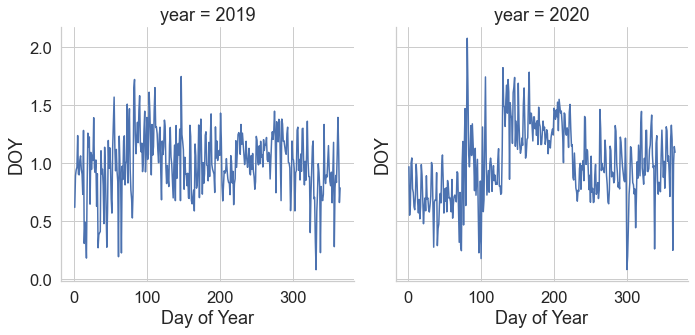

In [261]:
# now plot the DOY for all sites first
#plt.figure(figsize=(20,30))

sns.set(font_scale=1.5)
sns.set_style("whitegrid")
g=sns.relplot(
    data=doy_factor_d12.loc[doy_factor_d12['Strata']==1], x="day_of_year", y="DOY",
    col="year", 
    kind="line"
)
for ax in g.axes.flat:
     ax.set_xlabel('Day of Year', visible=True)
     ax.set_ylabel('DOY', visible=True)
g.set(xticks=[0,  100,200, 300])
plt.tight_layout()
plt.show()

# Trail and Path Strata

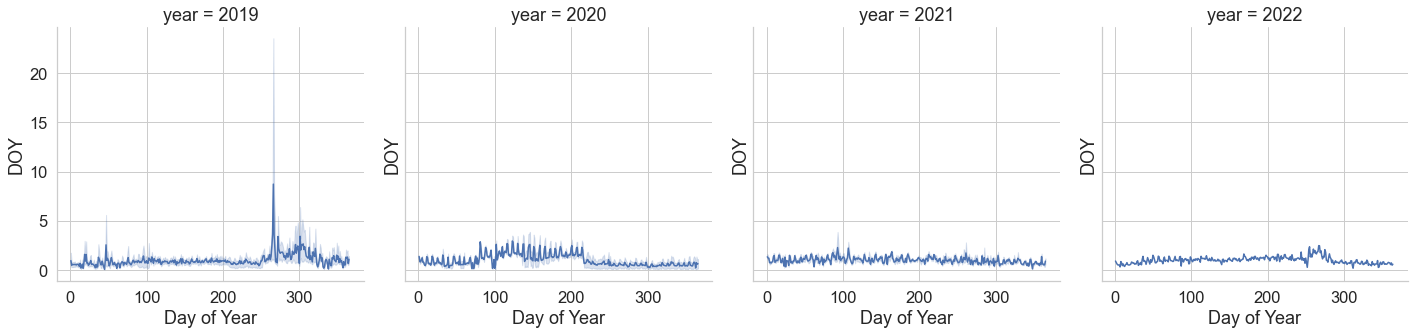

In [262]:
# now plot the DOY for all sites first
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
g=sns.relplot(
    data=doy_factor_d12.loc[doy_factor_d12['Strata']==2], x="day_of_year", y="DOY",
    col="year", 
    kind="line"
)
for ax in g.axes.flat:
     ax.set_xlabel('Day of Year', visible=True)
     ax.set_ylabel('DOY', visible=True)
g.set(xticks=[0,  100,200, 300])
plt.tight_layout()
plt.show()

In [263]:
data=doy_factor_d12.loc[doy_factor_d12['Strata']==3]
hdata=doy_factor_d12.loc[doy_factor_d12['DOY']>5]
hdata.head()

,id,serial_num,user_type,domain,site_name,lat,long,bike_true,bike_ped_t,DISTRICT,...,days_in_month,maximum_days_in_a_month_allowed,no_of_days_data_collected,weighted_MADBT_sum,weighted_days_sum,AADBT,DOY,Standard Deviation,day_of_year,Strata
263,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,30,27,30,51236.0,365,140.372603,5.364295,NaN,264,2
264,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,30,27,30,51236.0,365,140.372603,10.885315,NaN,265,2
265,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,30,27,30,51236.0,365,140.372603,30.953334,NaN,266,2
266,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,30,27,30,51236.0,365,140.372603,9.716996,NaN,267,2
267,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,30,27,30,51236.0,365,140.372603,6.824694,NaN,268,2


In [264]:
# # now plot the DOY for all sites first
# g=sns.relplot(
#     data=doy_factor_d12.loc[doy_factor_d12['Strata']==3], x="day_of_year", y="DOY",
#     col="year", 
#     kind="line"
# )
# for ax in g.axes.flat:
#      ax.set_xlabel('Day of Year', visible=True)
#      ax.set_ylabel('DOY', visible=True)
# g.set(xticks=[0,  100,200, 300])
# plt.tight_layout()
# plt.show()

# Others( Bike Route, Cycycle Track and Unknown)

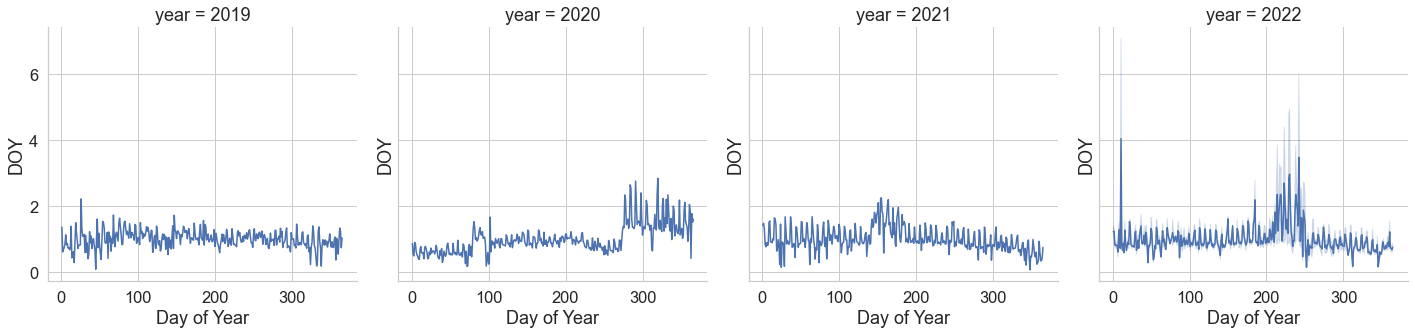

In [265]:
# now plot the DOY for all sites first
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
g=sns.relplot(
    data=doy_factor_d12.loc[doy_factor_d12['Strata']==3], x="day_of_year", y="DOY",
    col="year", 
    kind="line"
)
for ax in g.axes.flat:
     ax.set_xlabel('Day of Year', visible=True)
     ax.set_ylabel('DOY', visible=True)
g.set(xticks=[0,  100,200, 300])
plt.tight_layout()
plt.show()

# Plot all sites together

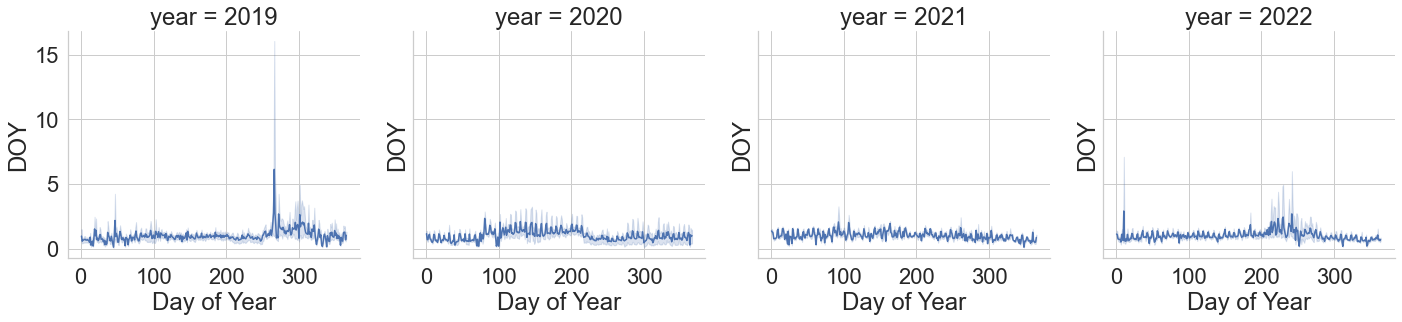

In [294]:
sns.set(font_scale=2.0)
sns.set_style("whitegrid")
g=sns.relplot(
    data=doy_factor_d12, x="day_of_year", y="DOY",
    col="year", 
    kind="line"
)
for ax in g.axes.flat:
     ax.set_xlabel('Day of Year', visible=True)
     ax.set_ylabel('DOY', visible=True)
g.set(xticks=[0,  100,200, 300])
plt.tight_layout()
plt.show()

# Create Urban and Rural Strata

In [ ]:
# read the urban shape file
# urban=gpd.read_file('H:/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/stanford-urban.json')
# urban.head()

In [ ]:
# urban2=urban.to_crs(epsg=7131)
# urban2.head()

In [ ]:
# set the geometry for the file
# doy_factor_d12_ns=doy_factor_d12.drop(['geometry'],axis=1)
# gdf_doy = gpd.GeoDataFrame(
#    doy_factor_d12_ns, geometry=gpd.points_from_xy(doy_factor_d12_ns.long, doy_factor_d12_ns.lat), crs="EPSG:4326"
# )
# doy_factor_d12_ru1=gdf_doy.to_crs(epsg=7131)
# doy_factor_d12_ru1.head()

In [ ]:
# get the urban area node connectivity 
# urban_counters=gpd.clip(doy_factor_d12_ru1,urban2)
# # Now get the rural areas
# rural_counters = doy_factor_d12_ru1.overlay(urban_counters, how='difference')
# rural_counters.shape,urban_counters.shape 

In [ ]:
# As none of the counters located in rural region, therefore urban and rural stratification is not possible for D-12, 11 and 7

# Calculate the DOW Factor using the Formula= Average Volume of a Particular day/ Average Total Weekly Volume

In [267]:
average_weekly_Volume=pd.DataFrame({'weekly_average_Volume':eco_daily_vol1_filter2.groupby(['id','site_name','year','dayofweek'])['Daily_Volume'].mean()}).reset_index()
average_weekly_Volume.head(10)

,id,site_name,year,dayofweek,weekly_average_Volume
0,100000671,BART AT SPIRE,2019,0,298.961538
1,100000671,BART AT SPIRE,2019,1,292.283019
2,100000671,BART AT SPIRE,2019,2,297.423077
3,100000671,BART AT SPIRE,2019,3,303.538462
4,100000671,BART AT SPIRE,2019,4,315.884615
5,100000671,BART AT SPIRE,2019,5,405.288462
6,100000671,BART AT SPIRE,2019,6,402.826923
7,100000671,BART AT SPIRE,2020,0,506.205128
8,100000671,BART AT SPIRE,2020,1,496.871795
9,100000671,BART AT SPIRE,2020,2,510.200000


In [268]:
total_weekly_Volume=pd.DataFrame({'weekly_total_Volume':average_weekly_Volume.groupby(['id','site_name','year'])['weekly_average_Volume'].sum()}).reset_index()
total_weekly_Volume.head()

,id,site_name,year,weekly_total_Volume
0,100000671,BART AT SPIRE,2019,2316.206096
1,100000671,BART AT SPIRE,2020,3877.200000
2,100000671,BART AT SPIRE,2021,2426.763788
3,100000671,BART AT SPIRE,2022,2649.495475
4,100002695,LIWH: Serrano Trail (Gate 5),2019,2384.004757


In [269]:
dow_factor=pd.merge(average_weekly_Volume,total_weekly_Volume, on=['id','site_name','year'], how='inner' )
dow_factor['DOWF']=dow_factor['weekly_average_Volume']/dow_factor['weekly_total_Volume']
dow_factor.head()

,id,site_name,year,dayofweek,weekly_average_Volume,weekly_total_Volume,DOWF
0,100000671,BART AT SPIRE,2019,0,298.961538,2316.206096,0.129074
1,100000671,BART AT SPIRE,2019,1,292.283019,2316.206096,0.126190
2,100000671,BART AT SPIRE,2019,2,297.423077,2316.206096,0.128410
3,100000671,BART AT SPIRE,2019,3,303.538462,2316.206096,0.131050
4,100000671,BART AT SPIRE,2019,4,315.884615,2316.206096,0.136380


In [270]:
dow_factor.groupby(['id','year'])['DOWF'].sum()

id         year
100000671  2019    1.0
           2020    1.0
           2021    1.0
           2022    1.0
100002695  2019    1.0
                  ... 
300024180  2022    1.0
300024181  2022    1.0
300024183  2022    1.0
300024225  2022    1.0
300032304  2022    1.0
Name: DOWF, Length: 280, dtype: float64

In [271]:
# now combine with static data
dow_factor4=pd.merge(static_qc,dow_factor, on=['id','site_name','year'], how='inner')
dow_factor4.head()

,id,site_name,year,Bicycle_Fa,Distance_to_water_area,distanc_sch_coll_uni,dayofweek,weekly_average_Volume,weekly_total_Volume,DOWF
0,100013426,Serrano Creek at Dimension,2019,Trail,0.720633,1.221488,0,211.173077,982.193759,0.215001
1,100013426,Serrano Creek at Dimension,2019,Trail,0.720633,1.221488,1,161.924528,982.193759,0.164860
2,100013426,Serrano Creek at Dimension,2019,Trail,0.720633,1.221488,2,140.153846,982.193759,0.142695
3,100013426,Serrano Creek at Dimension,2019,Trail,0.720633,1.221488,3,122.980769,982.193759,0.125210
4,100013426,Serrano Creek at Dimension,2019,Trail,0.720633,1.221488,4,115.192308,982.193759,0.117281


In [272]:
# Stratified now
dow_factor4['Strata']=dow_factor4.apply(lambda row:strata(row['Bicycle_Fa'],row['distanc_sch_coll_uni']), axis=1)
dow_factor4.head()

,id,site_name,year,Bicycle_Fa,Distance_to_water_area,distanc_sch_coll_uni,dayofweek,weekly_average_Volume,weekly_total_Volume,DOWF,Strata
0,100013426,Serrano Creek at Dimension,2019,Trail,0.720633,1.221488,0,211.173077,982.193759,0.215001,2
1,100013426,Serrano Creek at Dimension,2019,Trail,0.720633,1.221488,1,161.924528,982.193759,0.164860,2
2,100013426,Serrano Creek at Dimension,2019,Trail,0.720633,1.221488,2,140.153846,982.193759,0.142695,2
3,100013426,Serrano Creek at Dimension,2019,Trail,0.720633,1.221488,3,122.980769,982.193759,0.125210,2
4,100013426,Serrano Creek at Dimension,2019,Trail,0.720633,1.221488,4,115.192308,982.193759,0.117281,2


In [273]:
# check how many sites survive in each year
dow_factor4.groupby(['year'])['id'].nunique()

year
2019    6
2020    4
2021    4
2022    3
Name: id, dtype: int64

<AxesSubplot:xlabel='dayofweek', ylabel='DOWF'>

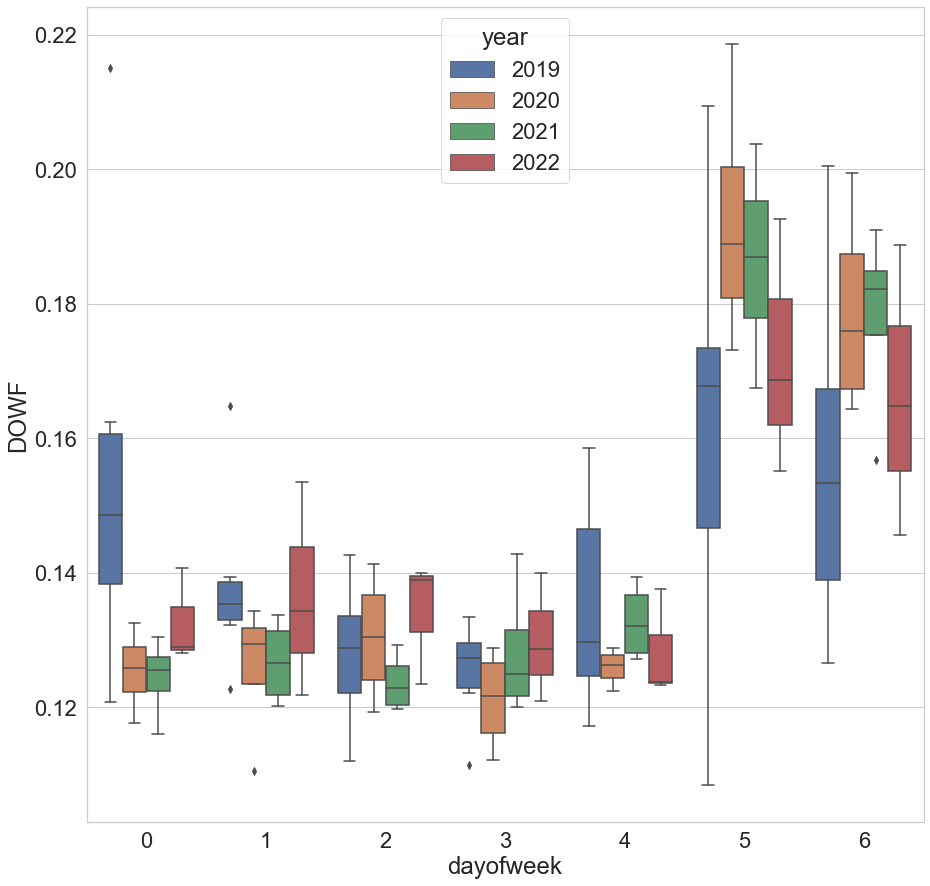

In [274]:
plt.figure(figsize=(15,15))
sns.set_theme(style="whitegrid", font_scale=2.0)
sns.boxplot(data=dow_factor4,  x="dayofweek", y="DOWF",
     hue="year")

<AxesSubplot:xlabel='dayofweek', ylabel='DOWF'>

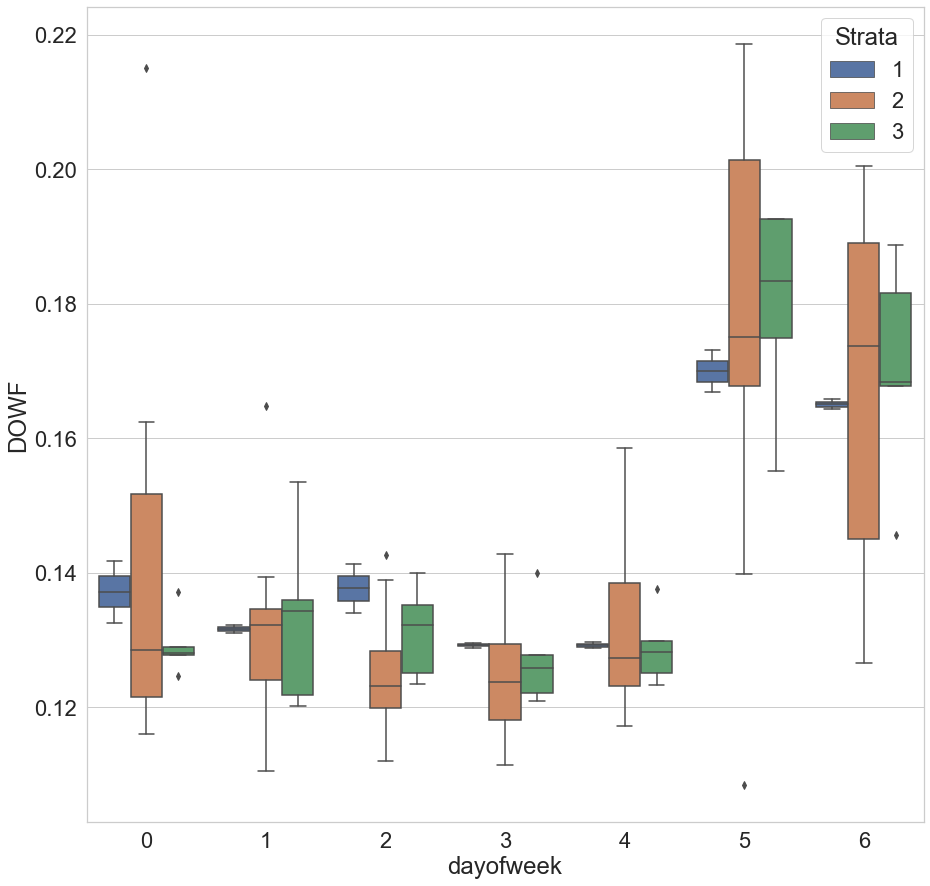

In [275]:
plt.figure(figsize=(15,15))
sns.set_theme(style="whitegrid", font_scale=2.0)
sns.boxplot(data=dow_factor4,  x="dayofweek", y="DOWF",
     hue="Strata")

# Calculate the MOY Factor

In [276]:
moy_f=pd.merge(Monthly_total_Volume1,aadbt_data2, on=['id','site_name','year'], how='inner')
moy_f['MOYF']=moy_f['MADBT']/moy_f['AADBT']
moy_f.head()

,id,site_name,year,month,MTT,days_in_month,MADBT,weighted_MADBT_sum,weighted_days_sum,AADBT,MOYF
0,100000671,BART AT SPIRE,2019,1,7311.0,31,235.838710,120735.0,365,330.780822,0.712976
1,100000671,BART AT SPIRE,2019,2,6179.0,28,220.678571,120735.0,365,330.780822,0.667144
2,100000671,BART AT SPIRE,2019,3,9531.0,31,307.451613,120735.0,365,330.780822,0.929472
3,100000671,BART AT SPIRE,2019,4,13465.0,30,448.833333,120735.0,365,330.780822,1.356890
4,100000671,BART AT SPIRE,2019,5,12971.0,31,418.419355,120735.0,365,330.780822,1.264944


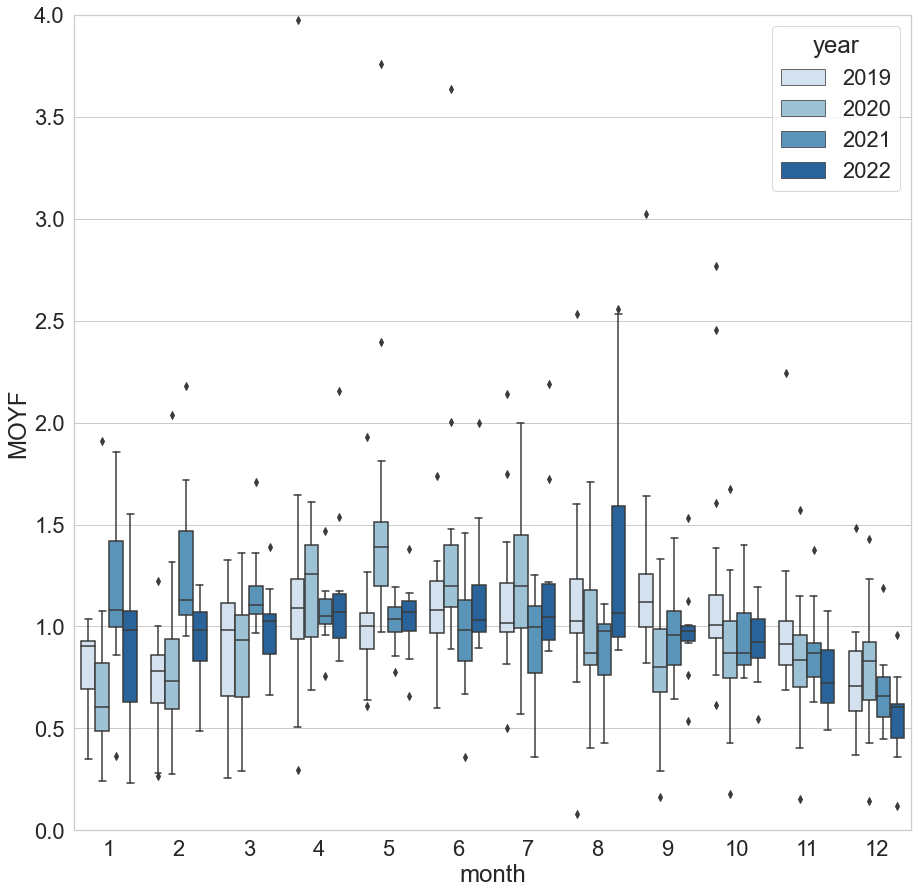

In [277]:
plt.figure(figsize=(15,15))
sns.set_theme(style="whitegrid", font_scale=2.0)
ax=sns.boxplot(data=moy_f,  x="month", y="MOYF",
     hue="year",palette="Blues")
ax.set(ylim=(0, 4.0))
plt.show()

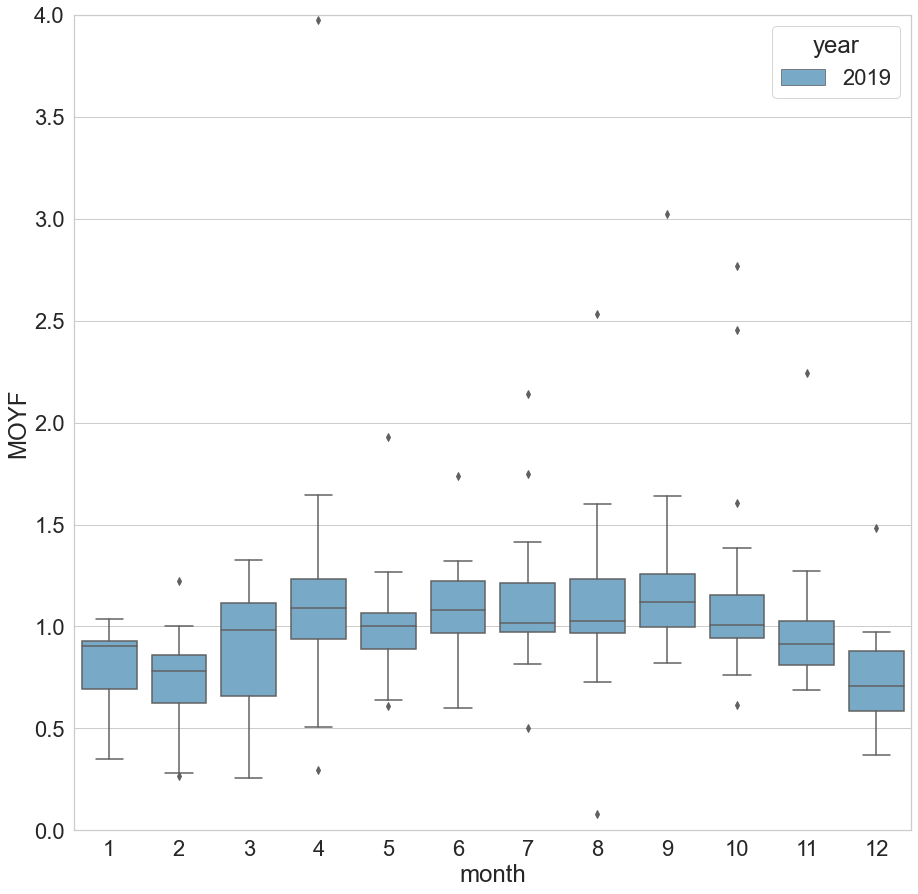

In [278]:
plt.figure(figsize=(15,15))
sns.set_theme(style="whitegrid", font_scale=2.0)
ax=sns.boxplot(data=moy_f.loc[moy_f['year']==2019],  x="month", y="MOYF",
     hue="year",palette="Blues")
ax.set(ylim=(0, 4.0))
plt.show()

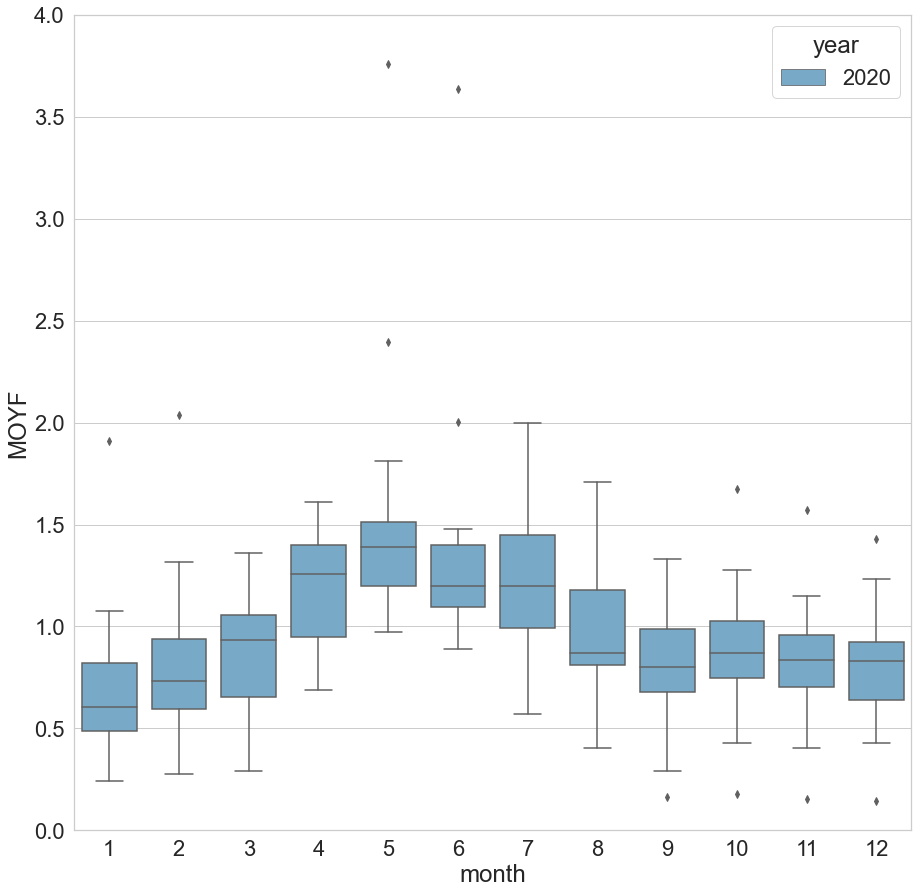

In [279]:
plt.figure(figsize=(15,15))
sns.set_theme(style="whitegrid", font_scale=2.0)
ax=sns.boxplot(data=moy_f.loc[moy_f['year']==2020],  x="month", y="MOYF",
     hue="year",palette="Blues")
ax.set(ylim=(0, 4.0))
plt.show()

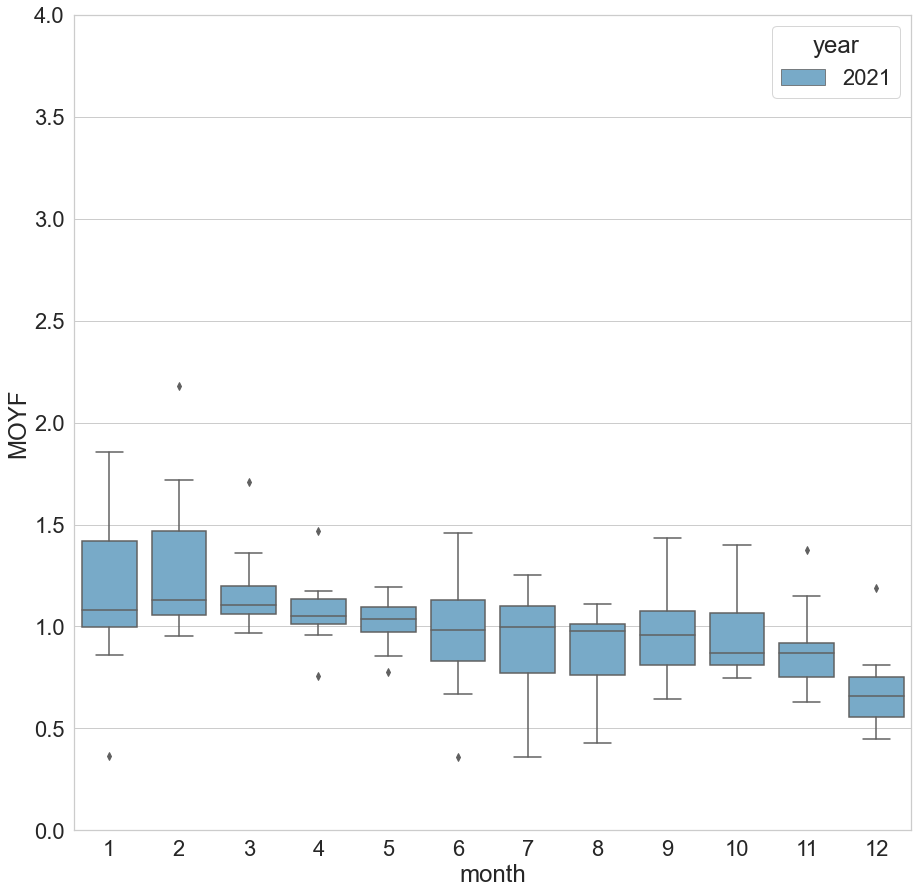

In [280]:
plt.figure(figsize=(15,15))
sns.set_theme(style="whitegrid", font_scale=2.0)
ax=sns.boxplot(data=moy_f.loc[moy_f['year']==2021],  x="month", y="MOYF",
     hue="year",palette="Blues")
ax.set(ylim=(0, 4.0))
plt.show()

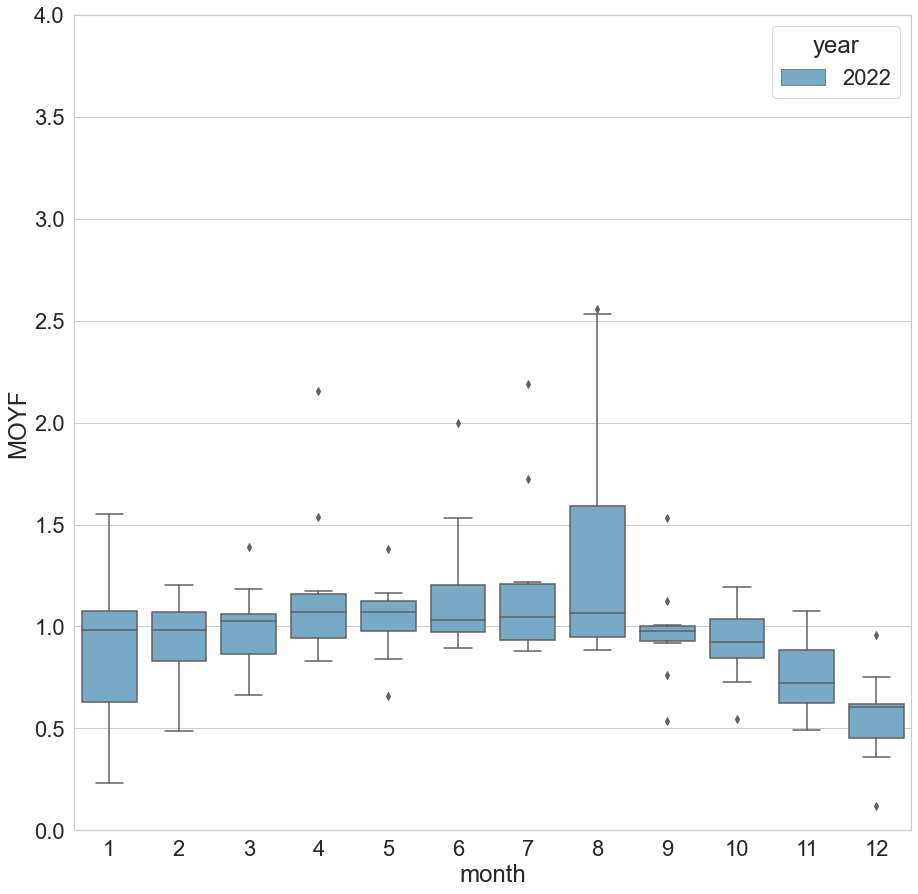

In [281]:
plt.figure(figsize=(15,15))
sns.set_theme(style="whitegrid", font_scale=2.0)
ax=sns.boxplot(data=moy_f.loc[moy_f['year']==2022],  x="month", y="MOYF",
     hue="year",palette="Blues")
ax.set(ylim=(0, 4.0))
plt.show()

In [282]:
# Now apply the Strata
moy_factor_d12=pd.merge(static_var,moy_f, on=['id','site_name'], how='inner')
moy_factor_d12.head()

,id,serial_num,user_type,domain,site_name,lat,long,bike_true,bike_ped_t,DISTRICT,...,distanc_sch_coll_uni,year,month,MTT,days_in_month,MADBT,weighted_MADBT_sum,weighted_days_sum,AADBT,MOYF
0,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,1.221488,2019,1,1527.0,31,49.258065,51236.0,365,140.372603,0.350909
1,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,1.221488,2019,2,1423.0,28,50.821429,51236.0,365,140.372603,0.362047
2,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,1.221488,2019,3,2654.0,31,85.612903,51236.0,365,140.372603,0.609898
3,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,1.221488,2019,4,4596.0,30,153.200000,51236.0,365,140.372603,1.091381
4,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,1.221488,2019,5,4656.0,31,150.193548,51236.0,365,140.372603,1.069963


In [283]:
# Stratified now
moy_factor_d12['Strata']=moy_factor_d12.apply(lambda row:strata(row['Bicycle_Fa'],row['distanc_sch_coll_uni']), axis=1)
moy_factor_d12.head()

,id,serial_num,user_type,domain,site_name,lat,long,bike_true,bike_ped_t,DISTRICT,...,year,month,MTT,days_in_month,MADBT,weighted_MADBT_sum,weighted_days_sum,AADBT,MOYF,Strata
0,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,2019,1,1527.0,31,49.258065,51236.0,365,140.372603,0.350909,2
1,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,2019,2,1423.0,28,50.821429,51236.0,365,140.372603,0.362047,2
2,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,2019,3,2654.0,31,85.612903,51236.0,365,140.372603,0.609898,2
3,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,2019,4,4596.0,30,153.200000,51236.0,365,140.372603,1.091381,2
4,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,2019,5,4656.0,31,150.193548,51236.0,365,140.372603,1.069963,2


In [284]:
moy_factor_d12.groupby(['year','Strata'])['id'].nunique()

year  Strata
2019  1         1
      2         4
      3         1
2020  1         1
      2         2
      3         1
2021  2         3
      3         1
2022  2         1
      3         2
Name: id, dtype: int64

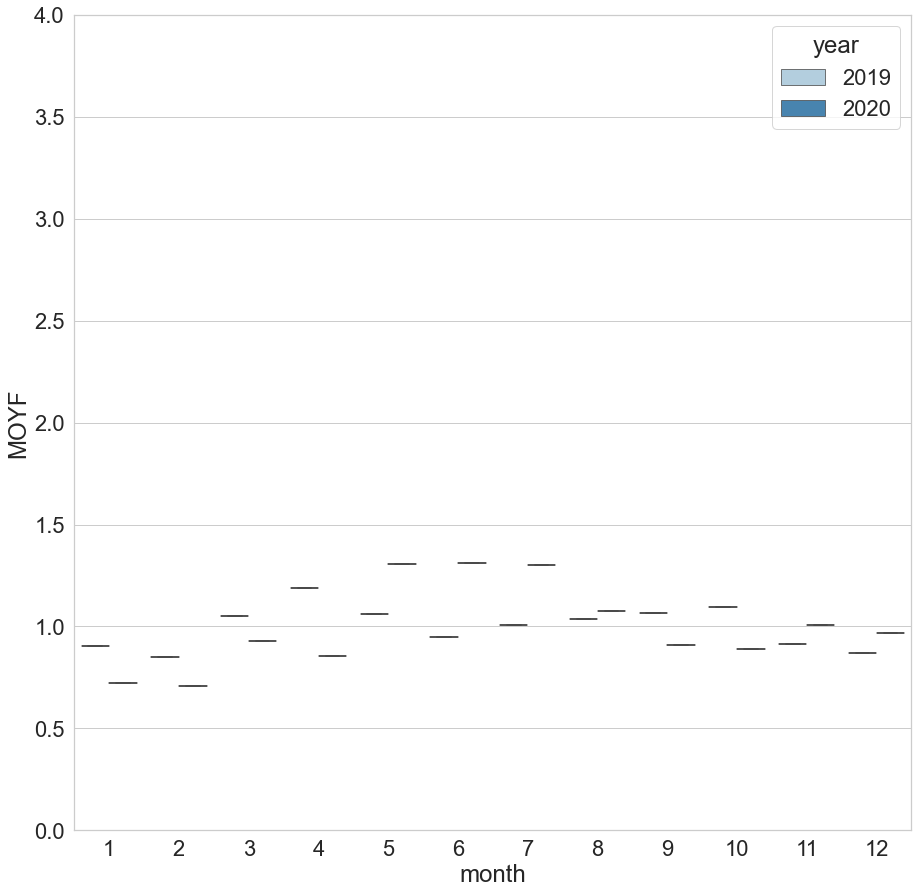

In [285]:
# University Strata
plt.figure(figsize=(15,15))
sns.set_theme(style="whitegrid", font_scale=2.0)
# sns.boxplot(data=moy_factor_d12[(moy_factor_d12.year==2019)&(moy_factor_d12.Strata==1)],  x="month", y="MOYF",
#      hue="year",palette="Blues")
ax=sns.boxplot(data=moy_factor_d12.loc[moy_factor_d12['Strata']==1],  x="month", y="MOYF",
      hue="year",palette="Blues")
ax.set(ylim=(0, 4.0))
plt.show()

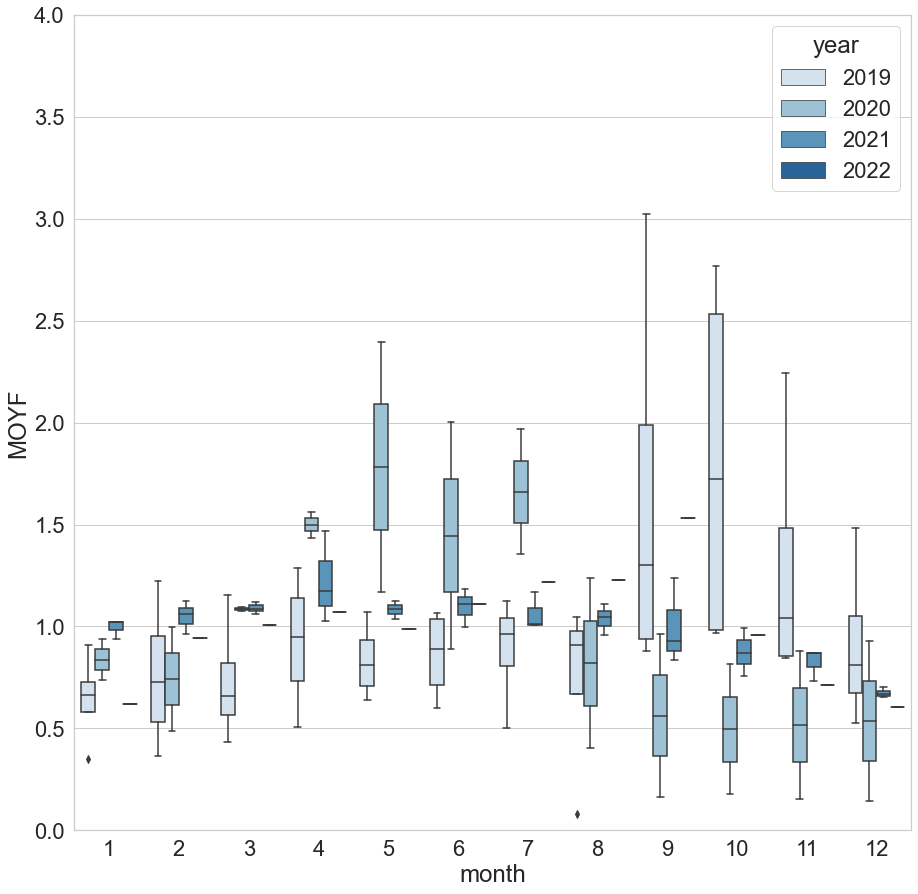

In [286]:
# path and Trail Strata
plt.figure(figsize=(15,15))
sns.set_theme(style="whitegrid", font_scale=2.0)
ax=sns.boxplot(data=moy_factor_d12.loc[moy_factor_d12['Strata']==2],  x="month", y="MOYF",
      hue="year",palette="Blues")
ax.set(ylim=(0, 4.0))
plt.show()

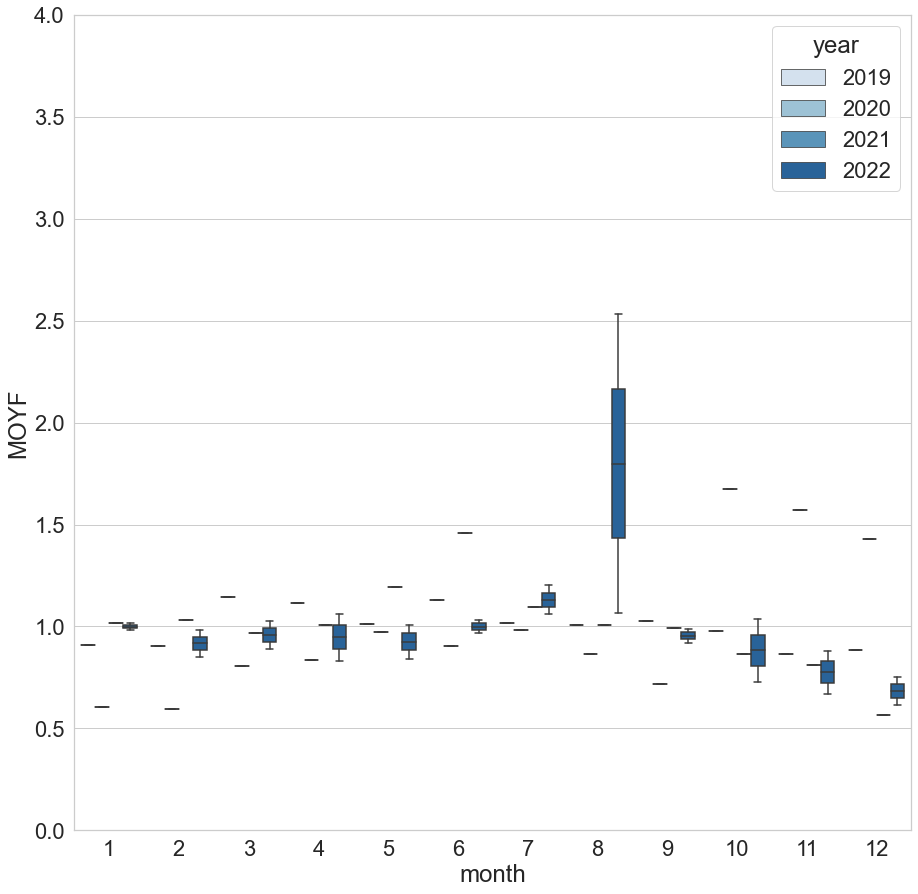

In [287]:
# other Strata
plt.figure(figsize=(15,15))
sns.set_theme(style="whitegrid", font_scale=2.0)
ax=sns.boxplot(data=moy_factor_d12.loc[moy_factor_d12['Strata']==3],  x="month", y="MOYF",
      hue="year",palette="Blues")
ax.set(ylim=(0, 4.0))
plt.show()

In [288]:
# Other Strata
# plt.figure(figsize=(15,15))
# sns.set_theme(style="whitegrid", font_scale=2.0)
# sns.boxplot(data=moy_factor_d12.loc[moy_factor_d12['Strata']==4],  x="month", y="MOYF",
#       hue="year",palette="Blues")

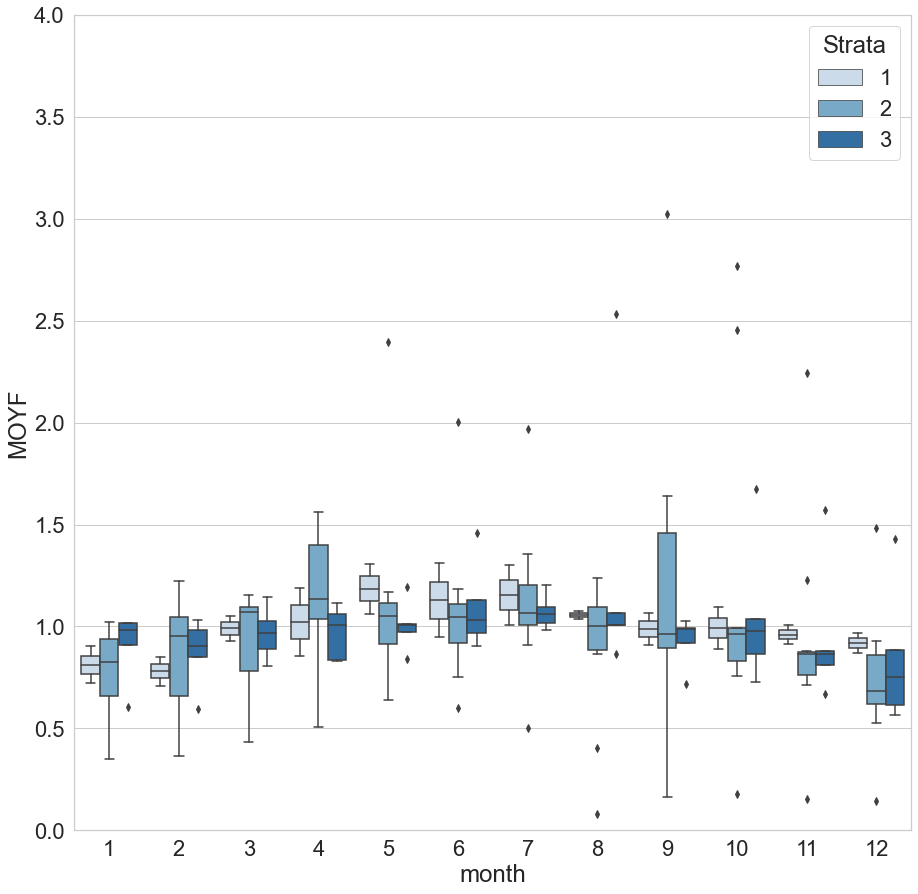

In [289]:
# plot all
plt.figure(figsize=(15,15))
sns.set_theme(style="whitegrid", font_scale=2.0)
ax=sns.boxplot(data=moy_factor_d12,  x="month", y="MOYF",
      hue="Strata",palette="Blues")
ax.set(ylim=(0, 4.0))
plt.show()

In [290]:
moy_factor_d12_unique=moy_factor_d12.drop_duplicates(subset=['id','site_name','year'])
moy_factor_d12_unique.shape

(17, 52)

In [291]:
# Export the geosjon file and visualize
# Import the node Connectivity
moy_factor_d12_unique.to_csv("C:/UC Berkeley Project Backup/AT Census/D12Analysis/strata_ped_file.csv")

In [292]:
# Calculate the average MOY factor for each Strata
averge_moyf=pd.DataFrame({'Average_MOYF':moy_factor_d12.groupby(['Strata','month','year'])['MOYF'].mean()}).reset_index()
averge_moyf

,Strata,month,year,Average_MOYF
0,1,1,2019,0.901685
1,1,1,2020,0.722951
2,1,2,2019,0.852250
3,1,2,2020,0.709267
4,1,3,2019,1.052958
...,...,...,...,...
115,3,11,2022,0.774174
116,3,12,2019,0.886168
117,3,12,2020,1.431198
118,3,12,2021,0.566087


# End of the code